# Understanding Convolution

![Image 28-01-24 at 03.32.JPG](<attachment:Image 28-01-24 at 03.32.JPG>)
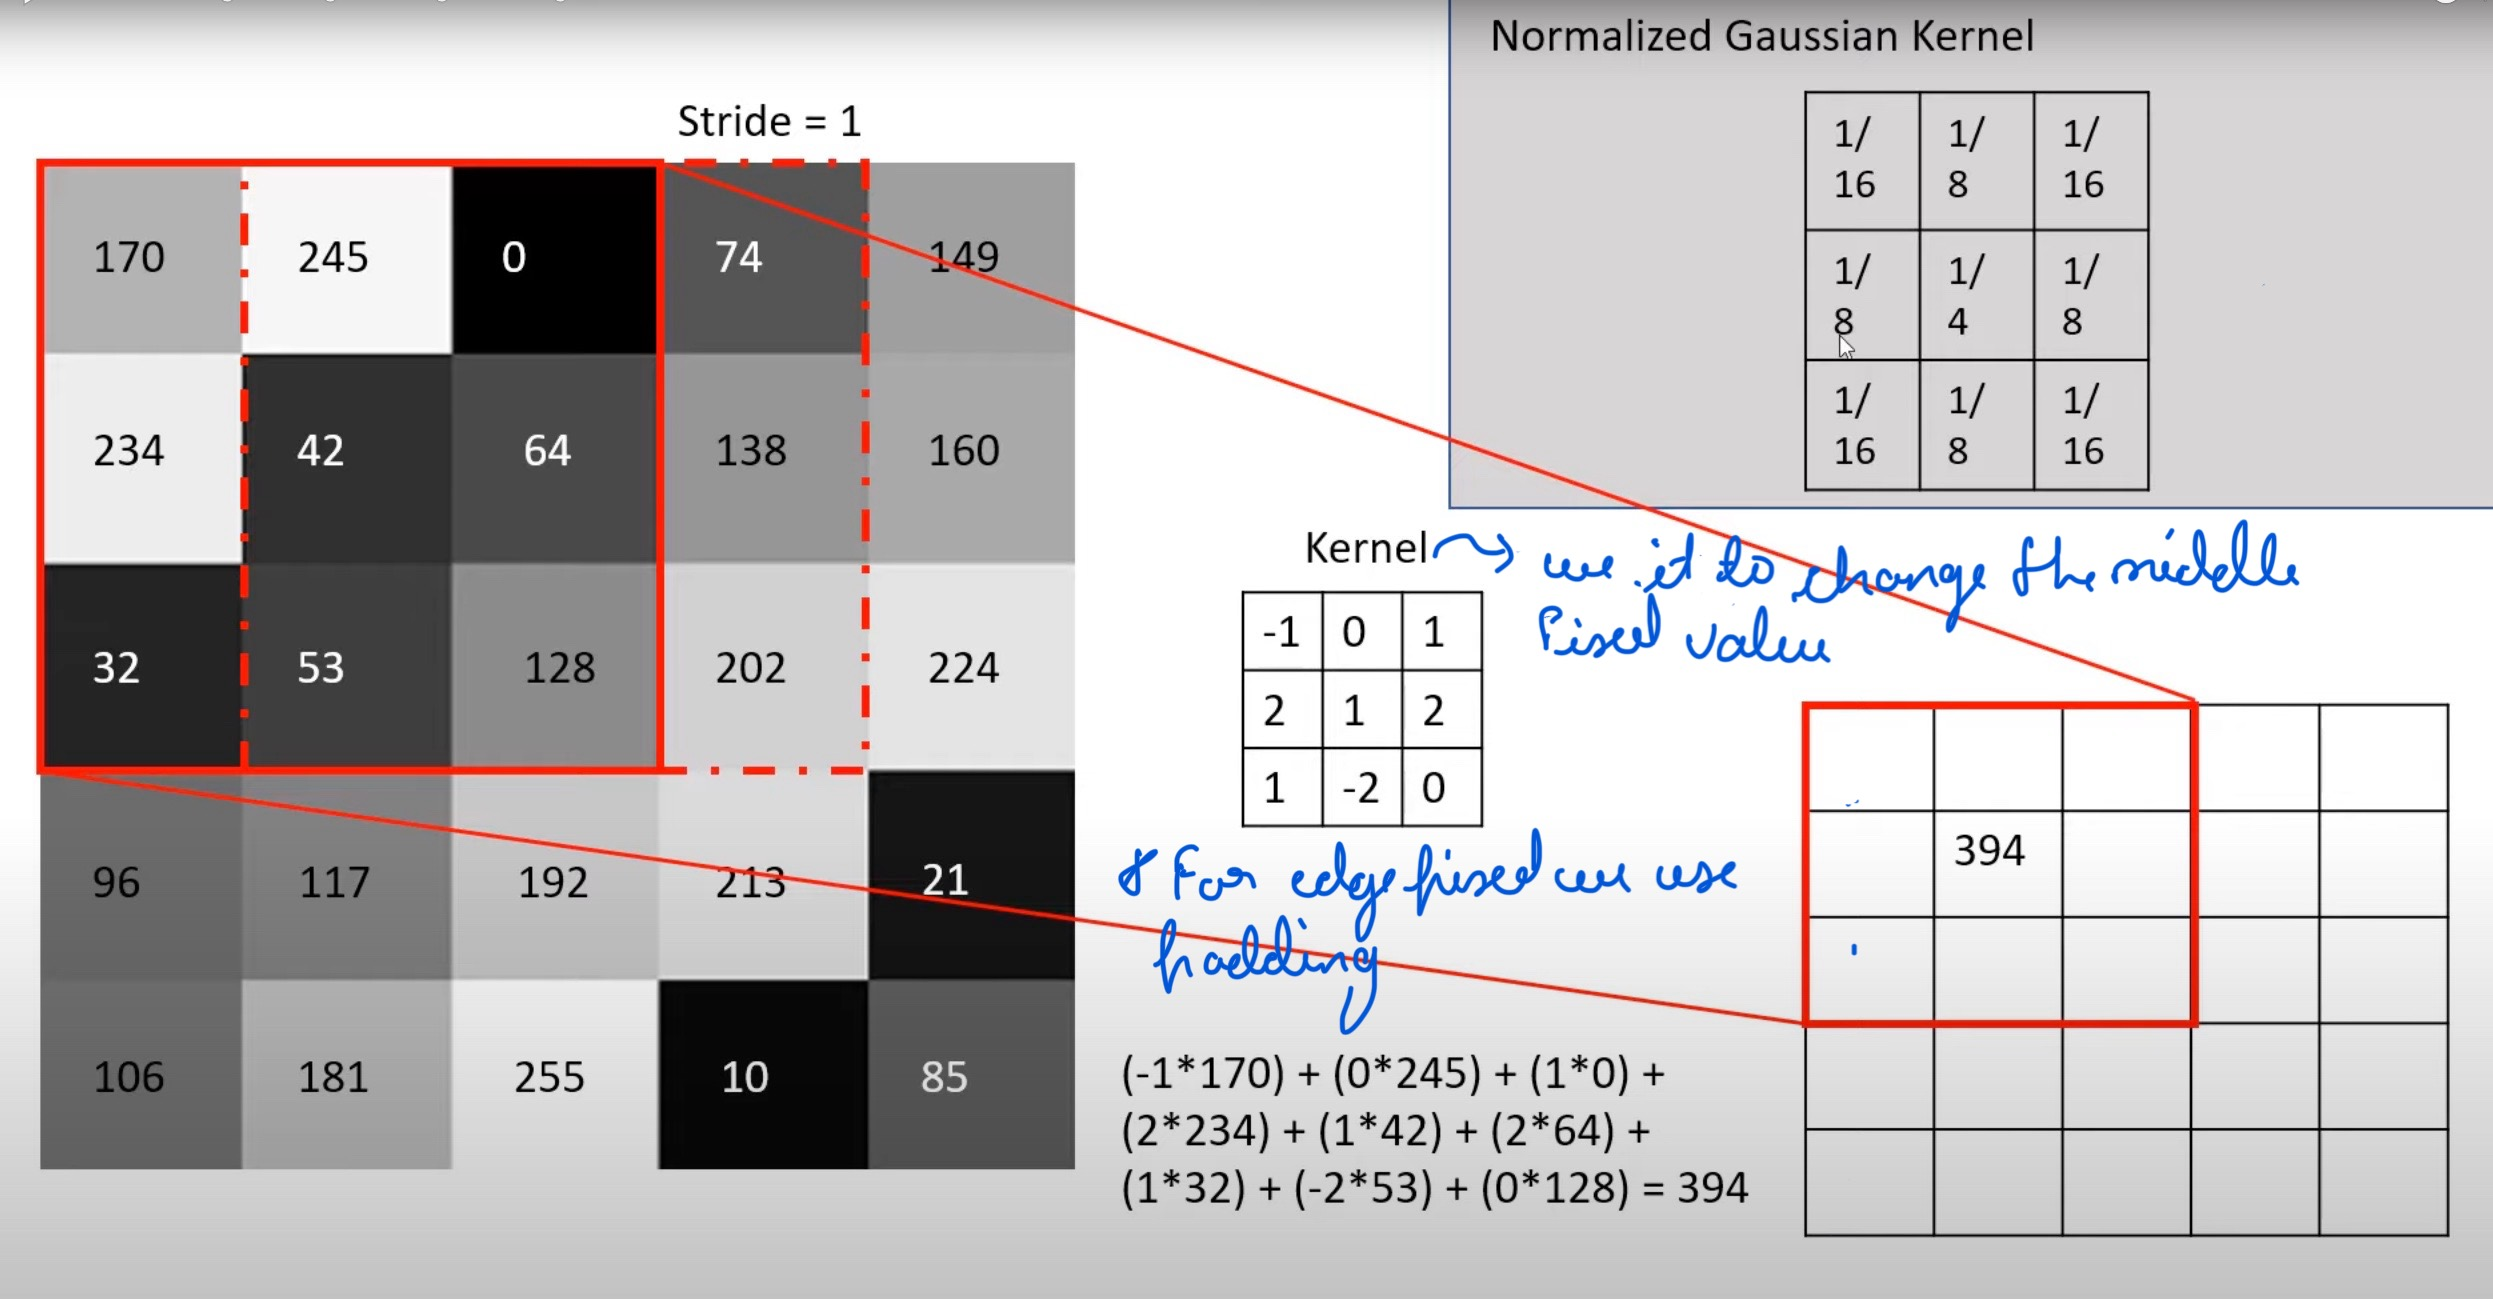

In [ ]:
from skimage import io, img_as_float
import numpy as np 
import cv2

img = img_as_float(io.imread("images/denoising/noise.jpg"), as_gray = True)

kernel = np.ones((5,5), np.float32)/25

gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

conv_using_cv2 = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT)

cv2.imshow("Original", img)
cv2.imshow("Cv2 Filter", conv_using_cv2)

cv2.waitKey(0)
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
cv2.destroyAllWindows()

# What is Gaussian filter

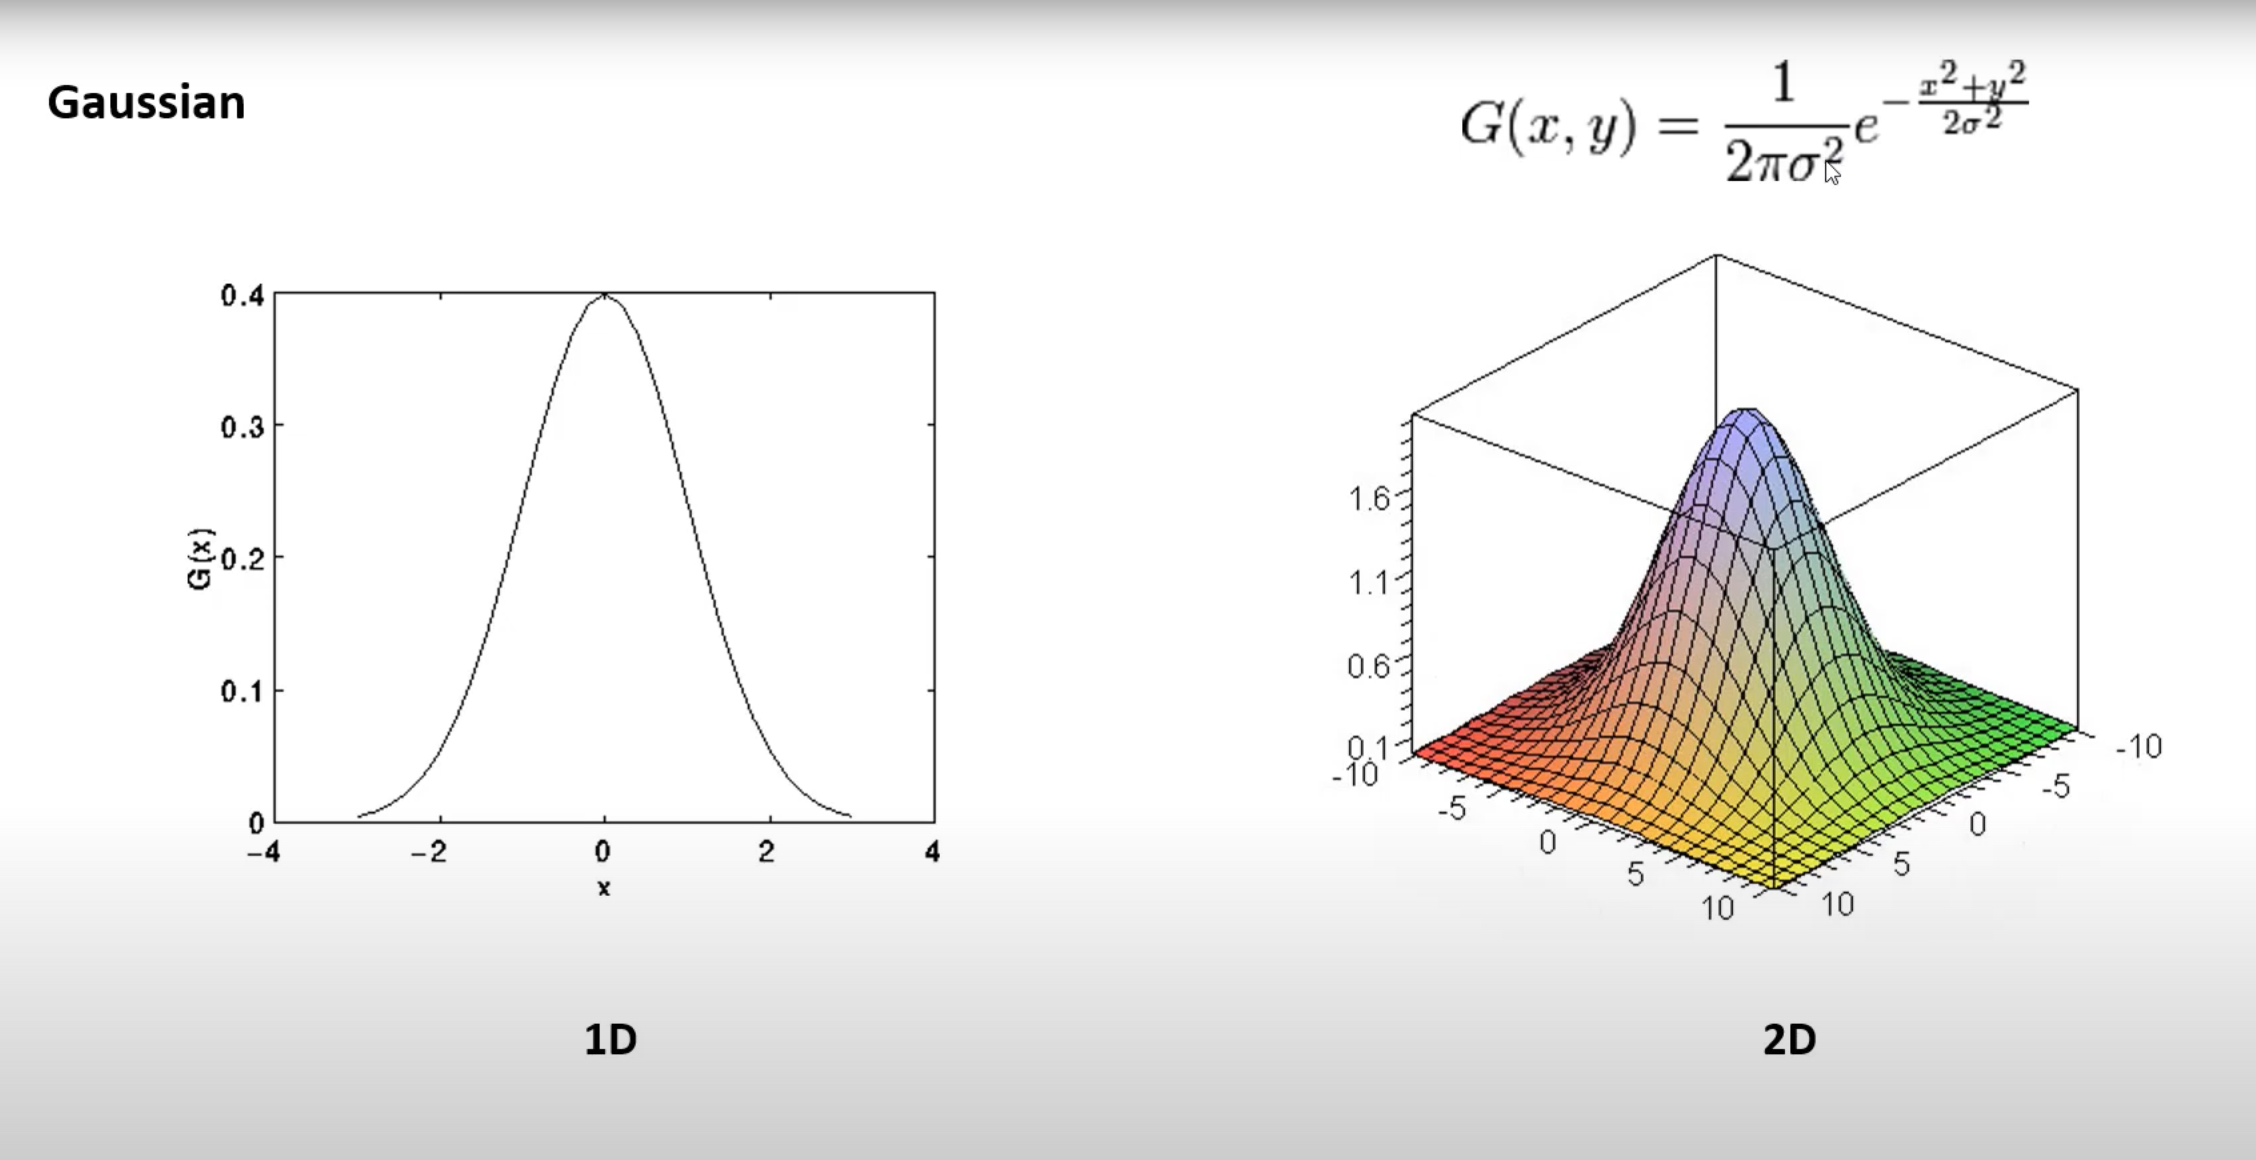

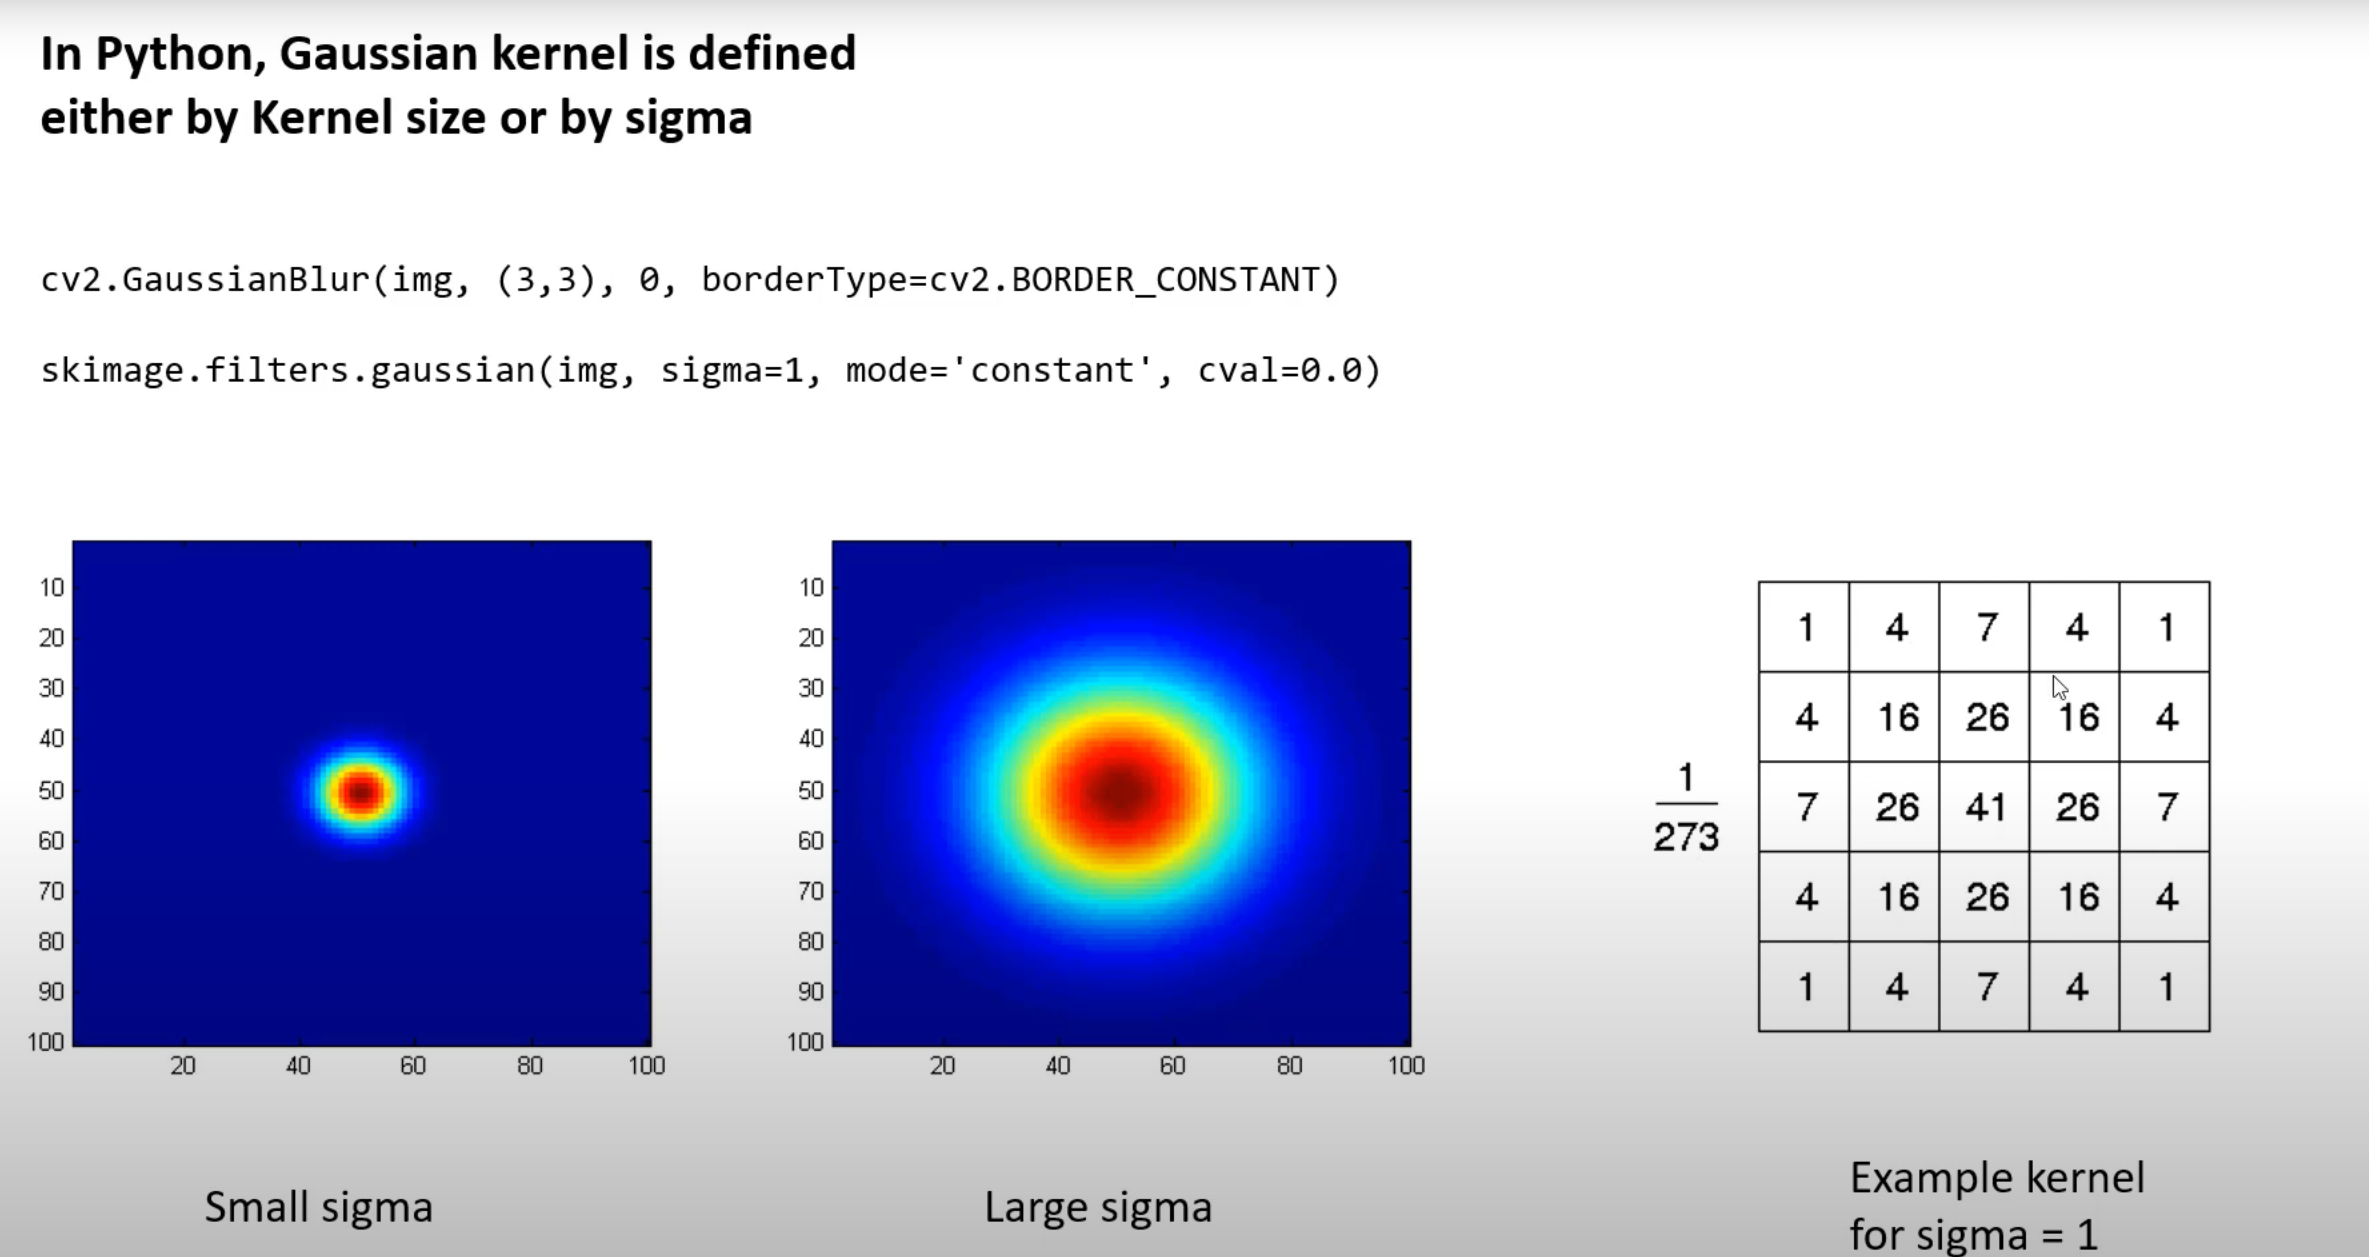

In [ ]:
import cv2 
import numpy as np 
from skimage import io, img_as_float
from skimage.filters import gaussian

img_gaussian_noise = img_as_float(io.imread("images/denoising/noise.jpg", as_gray=True))

img = img_gaussian_noise

gaussian_using_cv2 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT)
gaussian_using_skimage = gaussian(img, sigma=1, mode='constant', cval=0.0) # Mode andCval is handeling Padding

cv2.imshow("Original", img)
cv2.imshow("cv2 filter", gaussian_using_cv2)
cv2.imshow("skimage filter", gaussian_using_skimage)

cv2.waitKey(0)
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
cv2.destroyAllWindows()

# Median Denoising

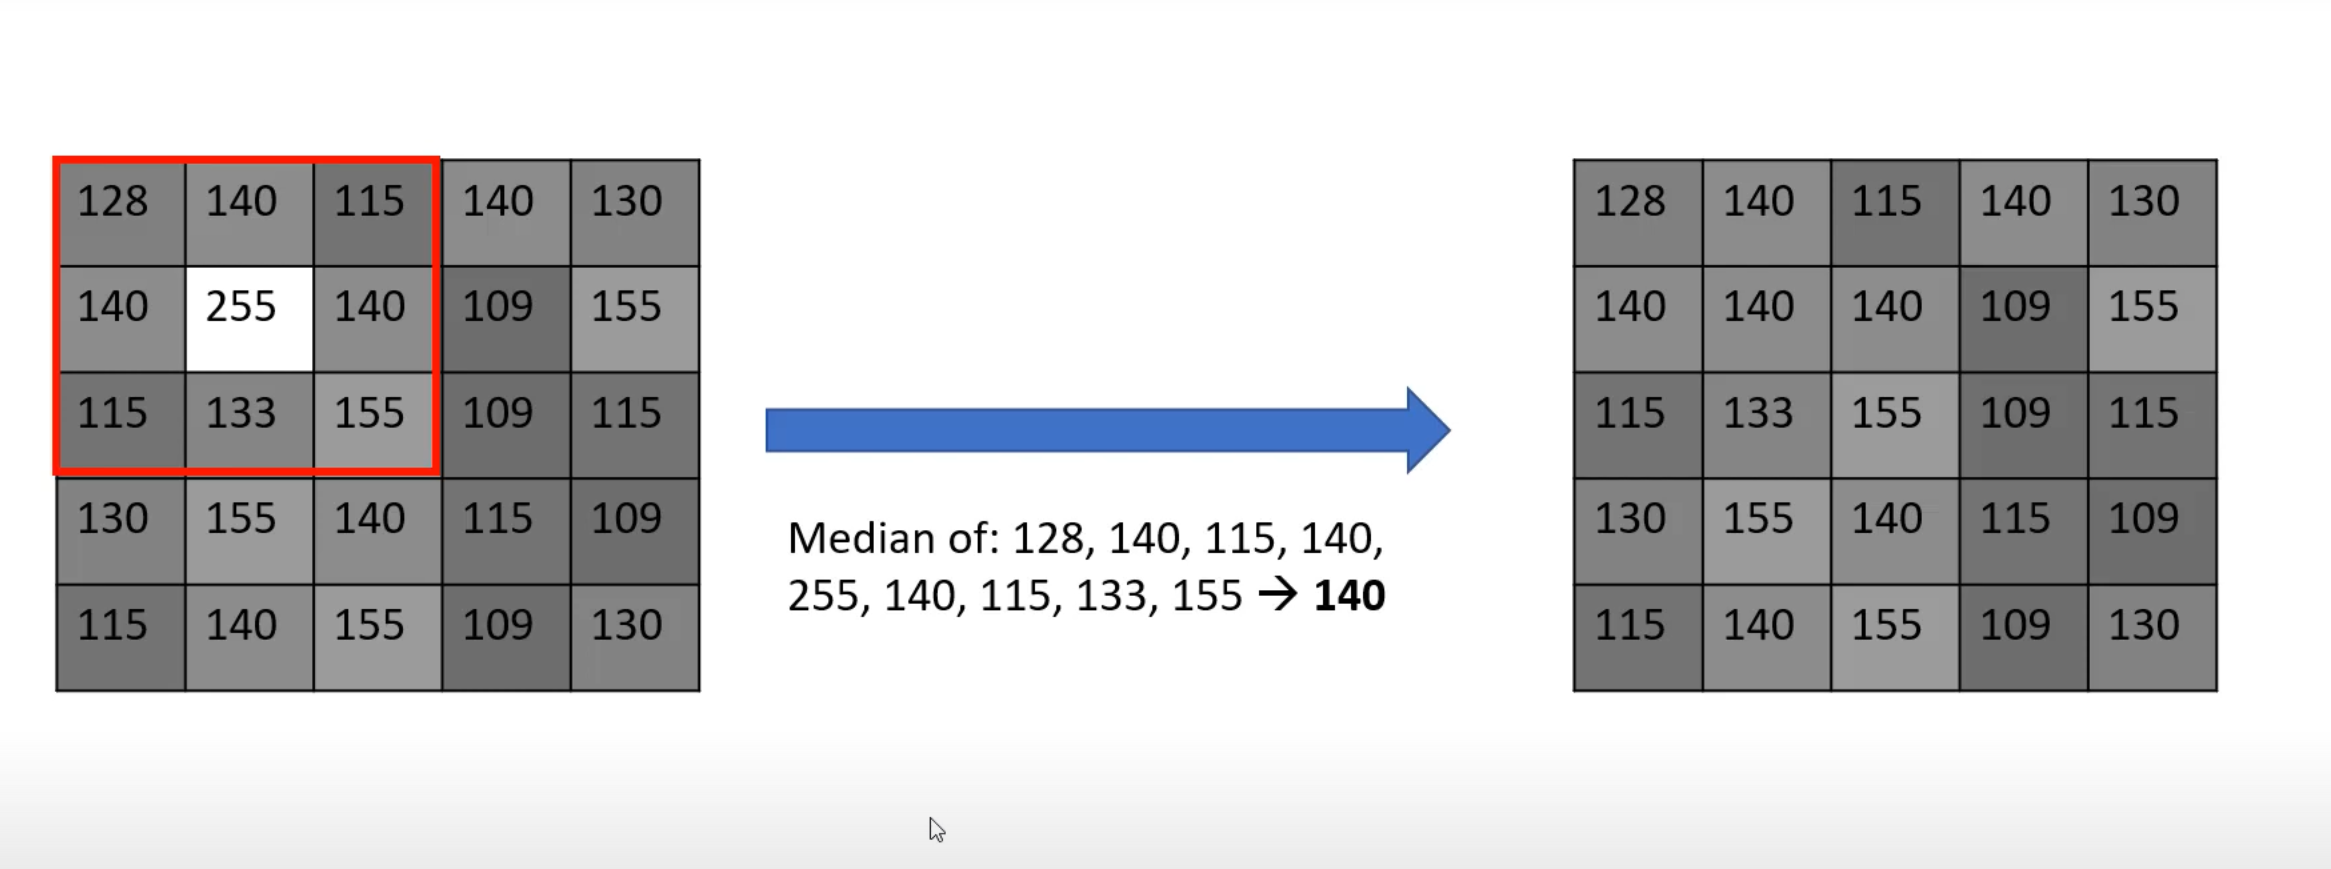

In [ ]:
from skimage.filters import median

img = cv2.imread("images/denoising/noise.jpg", 0)

median_using_cv2 = cv2.medianBlur(img, 3)

from skimage.morphology import disk
median_using_skimage = median(img, disk(3), mode='constant', cval=0.0)

cv2.imshow('Original image', img)
cv2.imshow("Cv2 filter", gaussian_using_cv2)
cv2.imshow("skimage filter", gaussian_using_skimage)

cv2.waitKey(0)
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
cv2.destroyAllWindows()

# Bilateral Filter

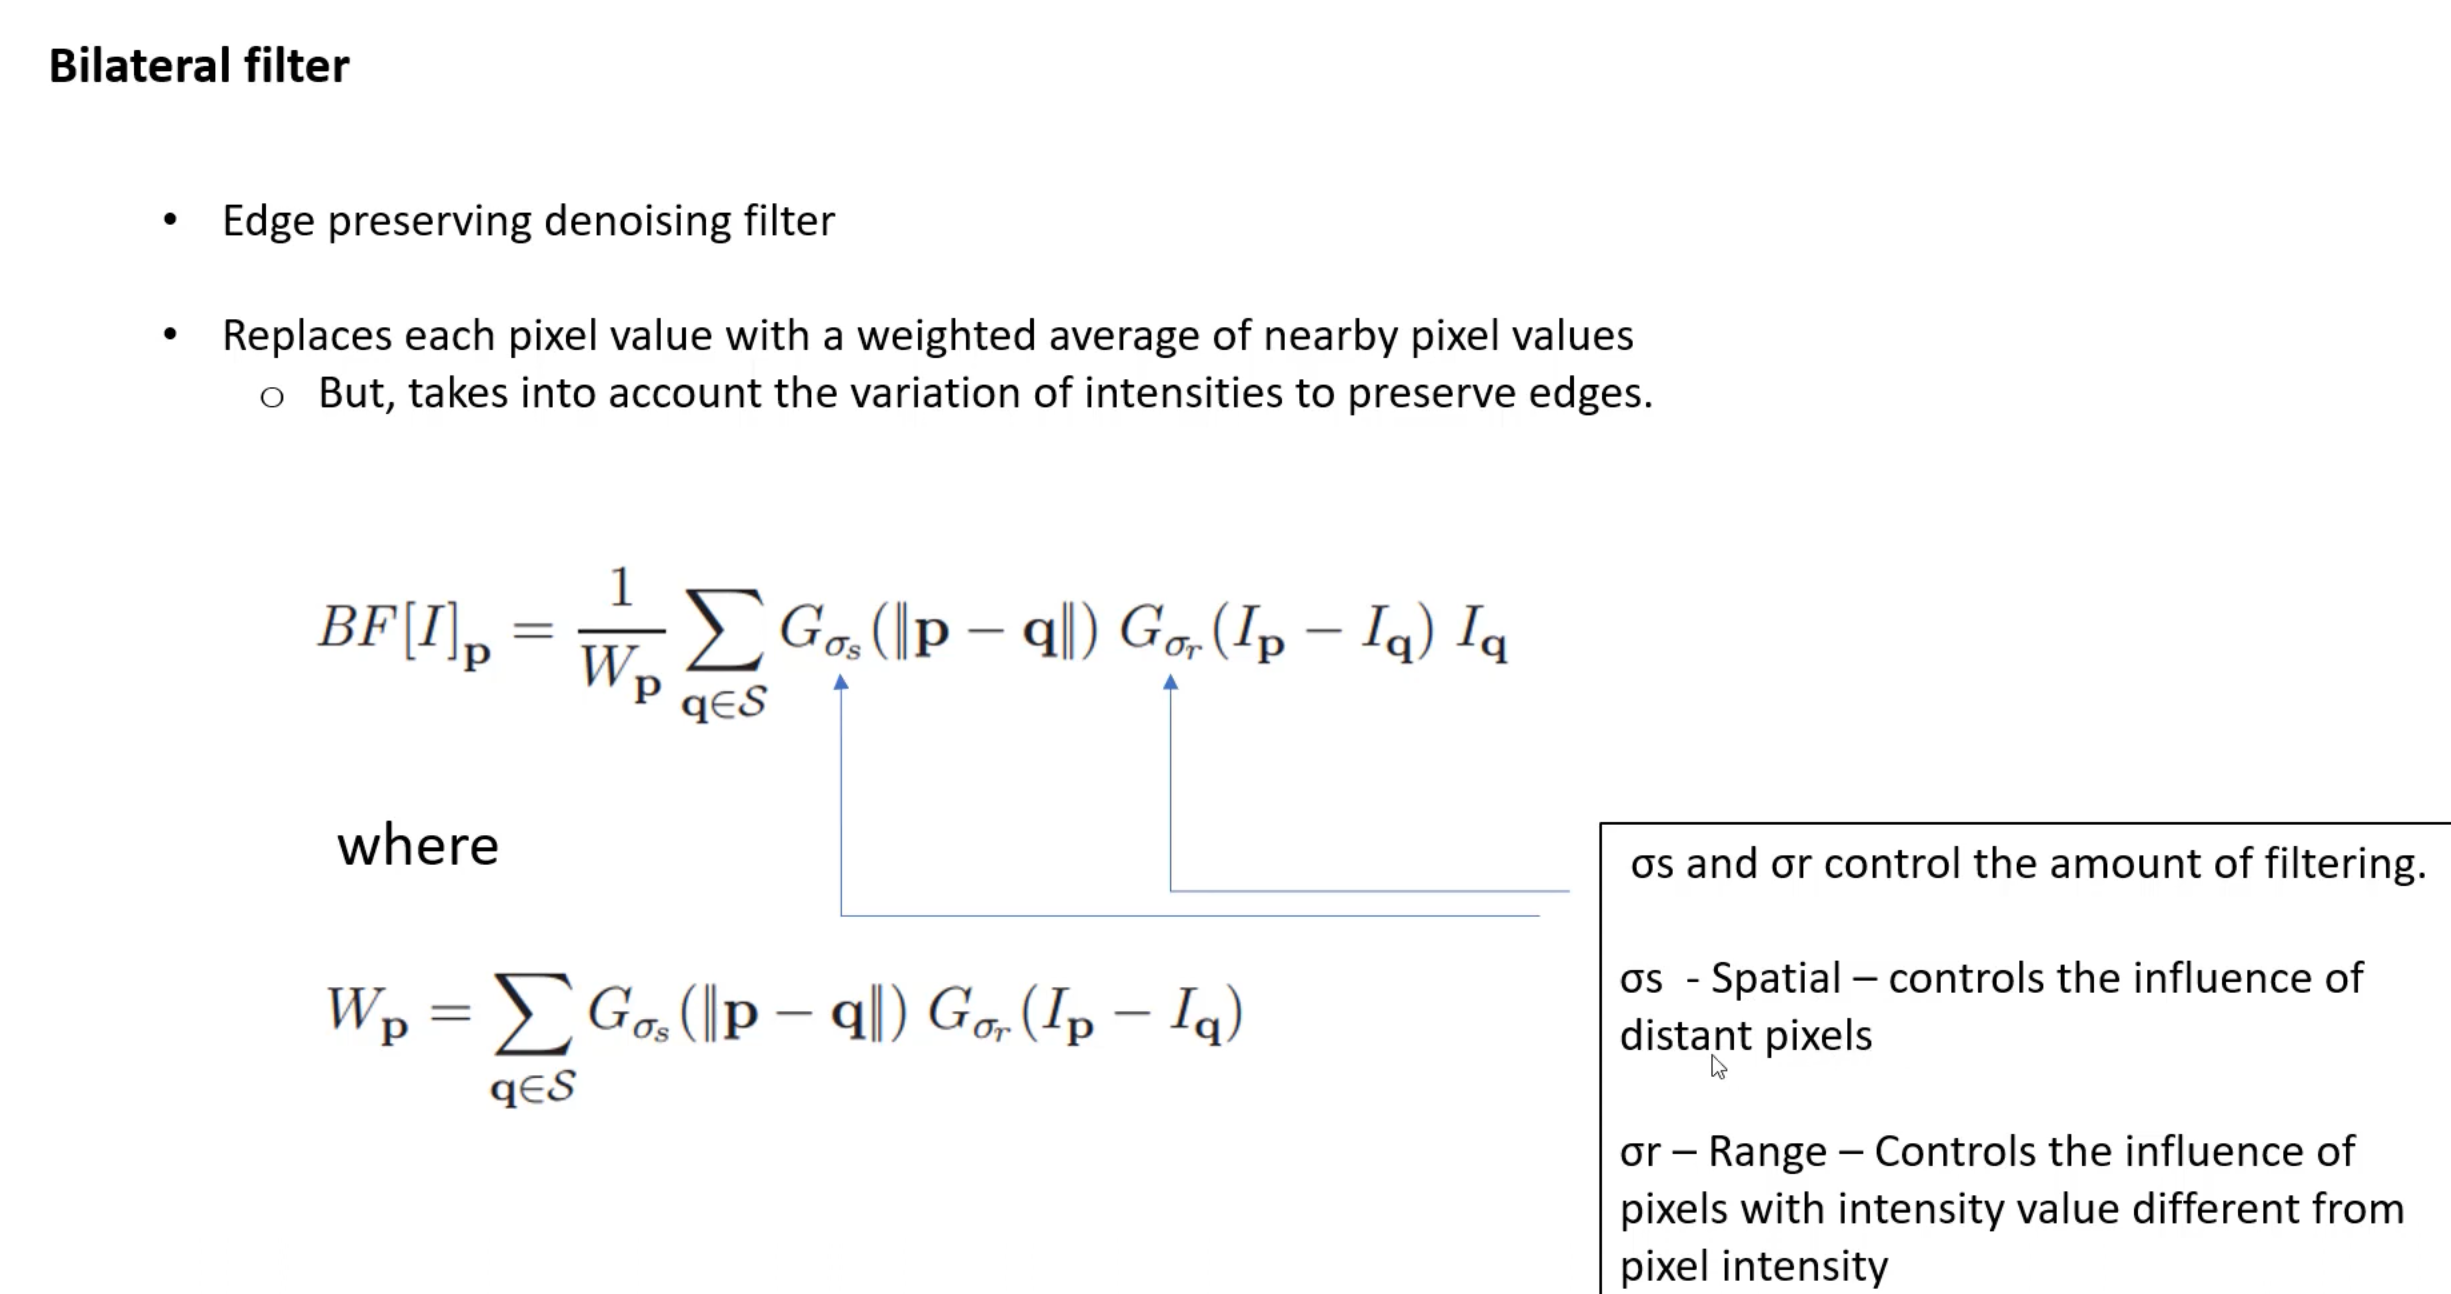

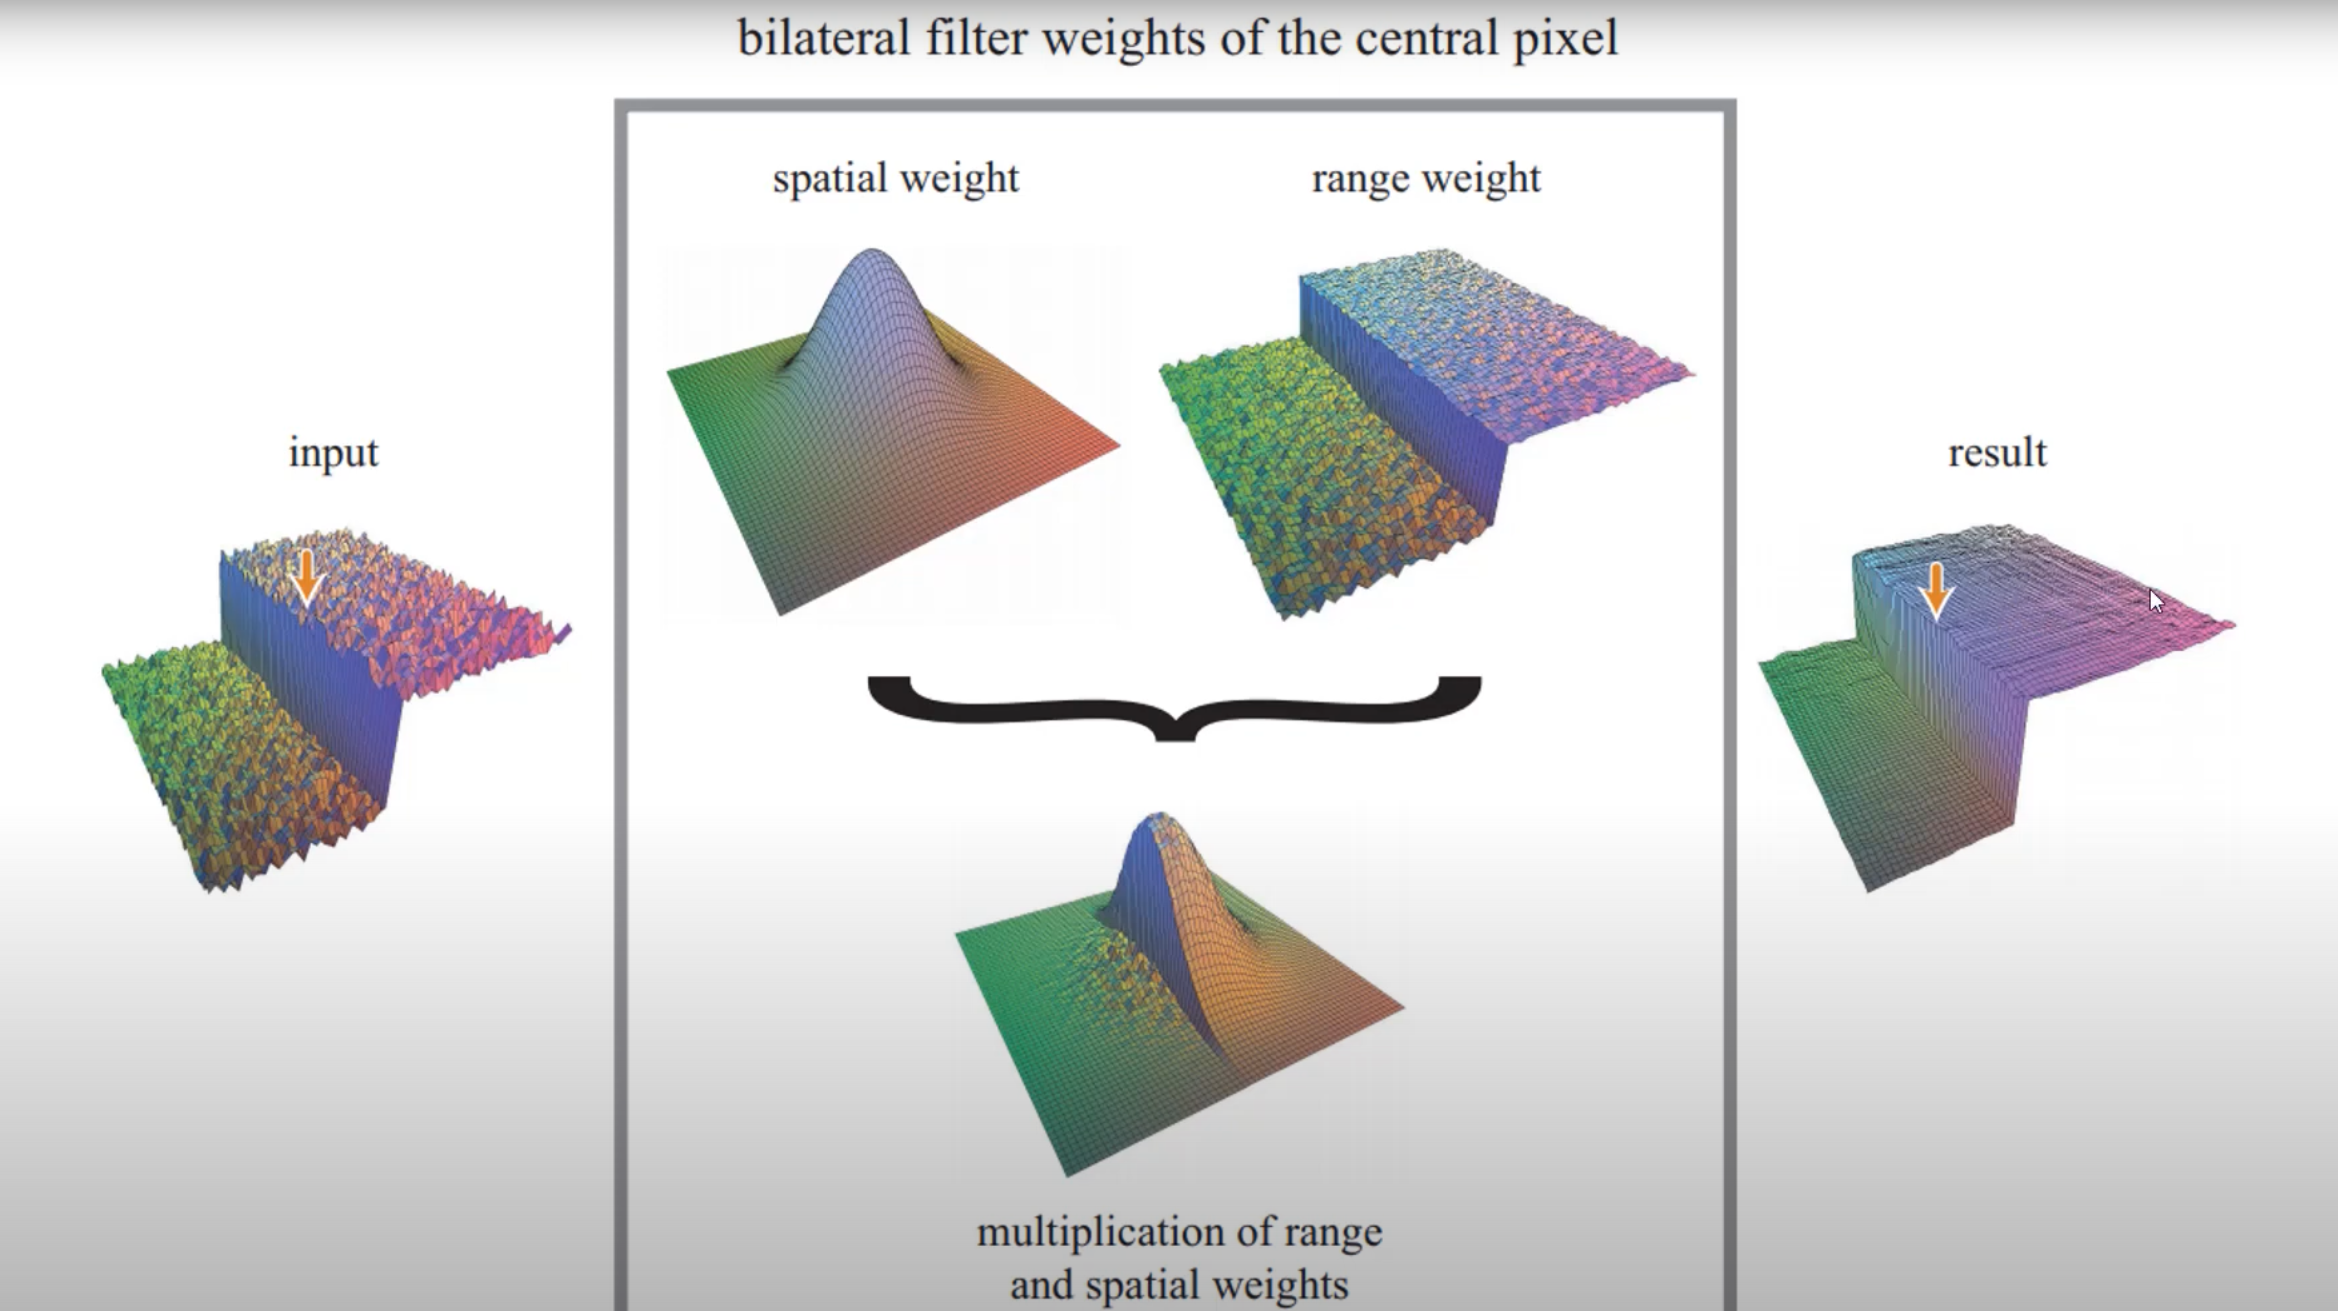

In [ ]:
from skimage.restoration import denoise_bilateral

img = cv2.imread("images/denoising/noise.jpg", 0)

bilateral_using_cv2 = cv2.bilateralFilter(img, 5, 20, 100, borderType=cv2.BORDER_CONSTANT)
bilateral_using_skimage = denoise_bilateral(img, sigma_color=0.05, sigma_spatial=15, channel_axis=0)

cv2.imshow('Original image', img)
cv2.imshow("Cv2 bilateral", bilateral_using_cv2)
cv2.imshow("Using skimage bilateral", bilateral_using_skimage)

cv2.waitKey(0)
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
cv2.destroyAllWindows()

# Non Local Means Filter

In [ ]:
from skimage.restoration import denoise_nl_means, estimate_sigma

img = img_as_float(io.imread ('images/denoising/noise.jpg'), as_gray=True)

sigma_est = np.mean (estimate_sigma(img, multichannel=False))

denoise_img = denoise_nl_means(img, h=1. *sigma_est, fast_mode=True,patch_size=5,
                                patch_distance=3, channel_axis=0)

cv2.imshow('Original image', img)
cv2.imshow("Denoised", denoise_img)

cv2.waitKey(0)
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
cv2.destroyAllWindows()

# Total Variation Filter

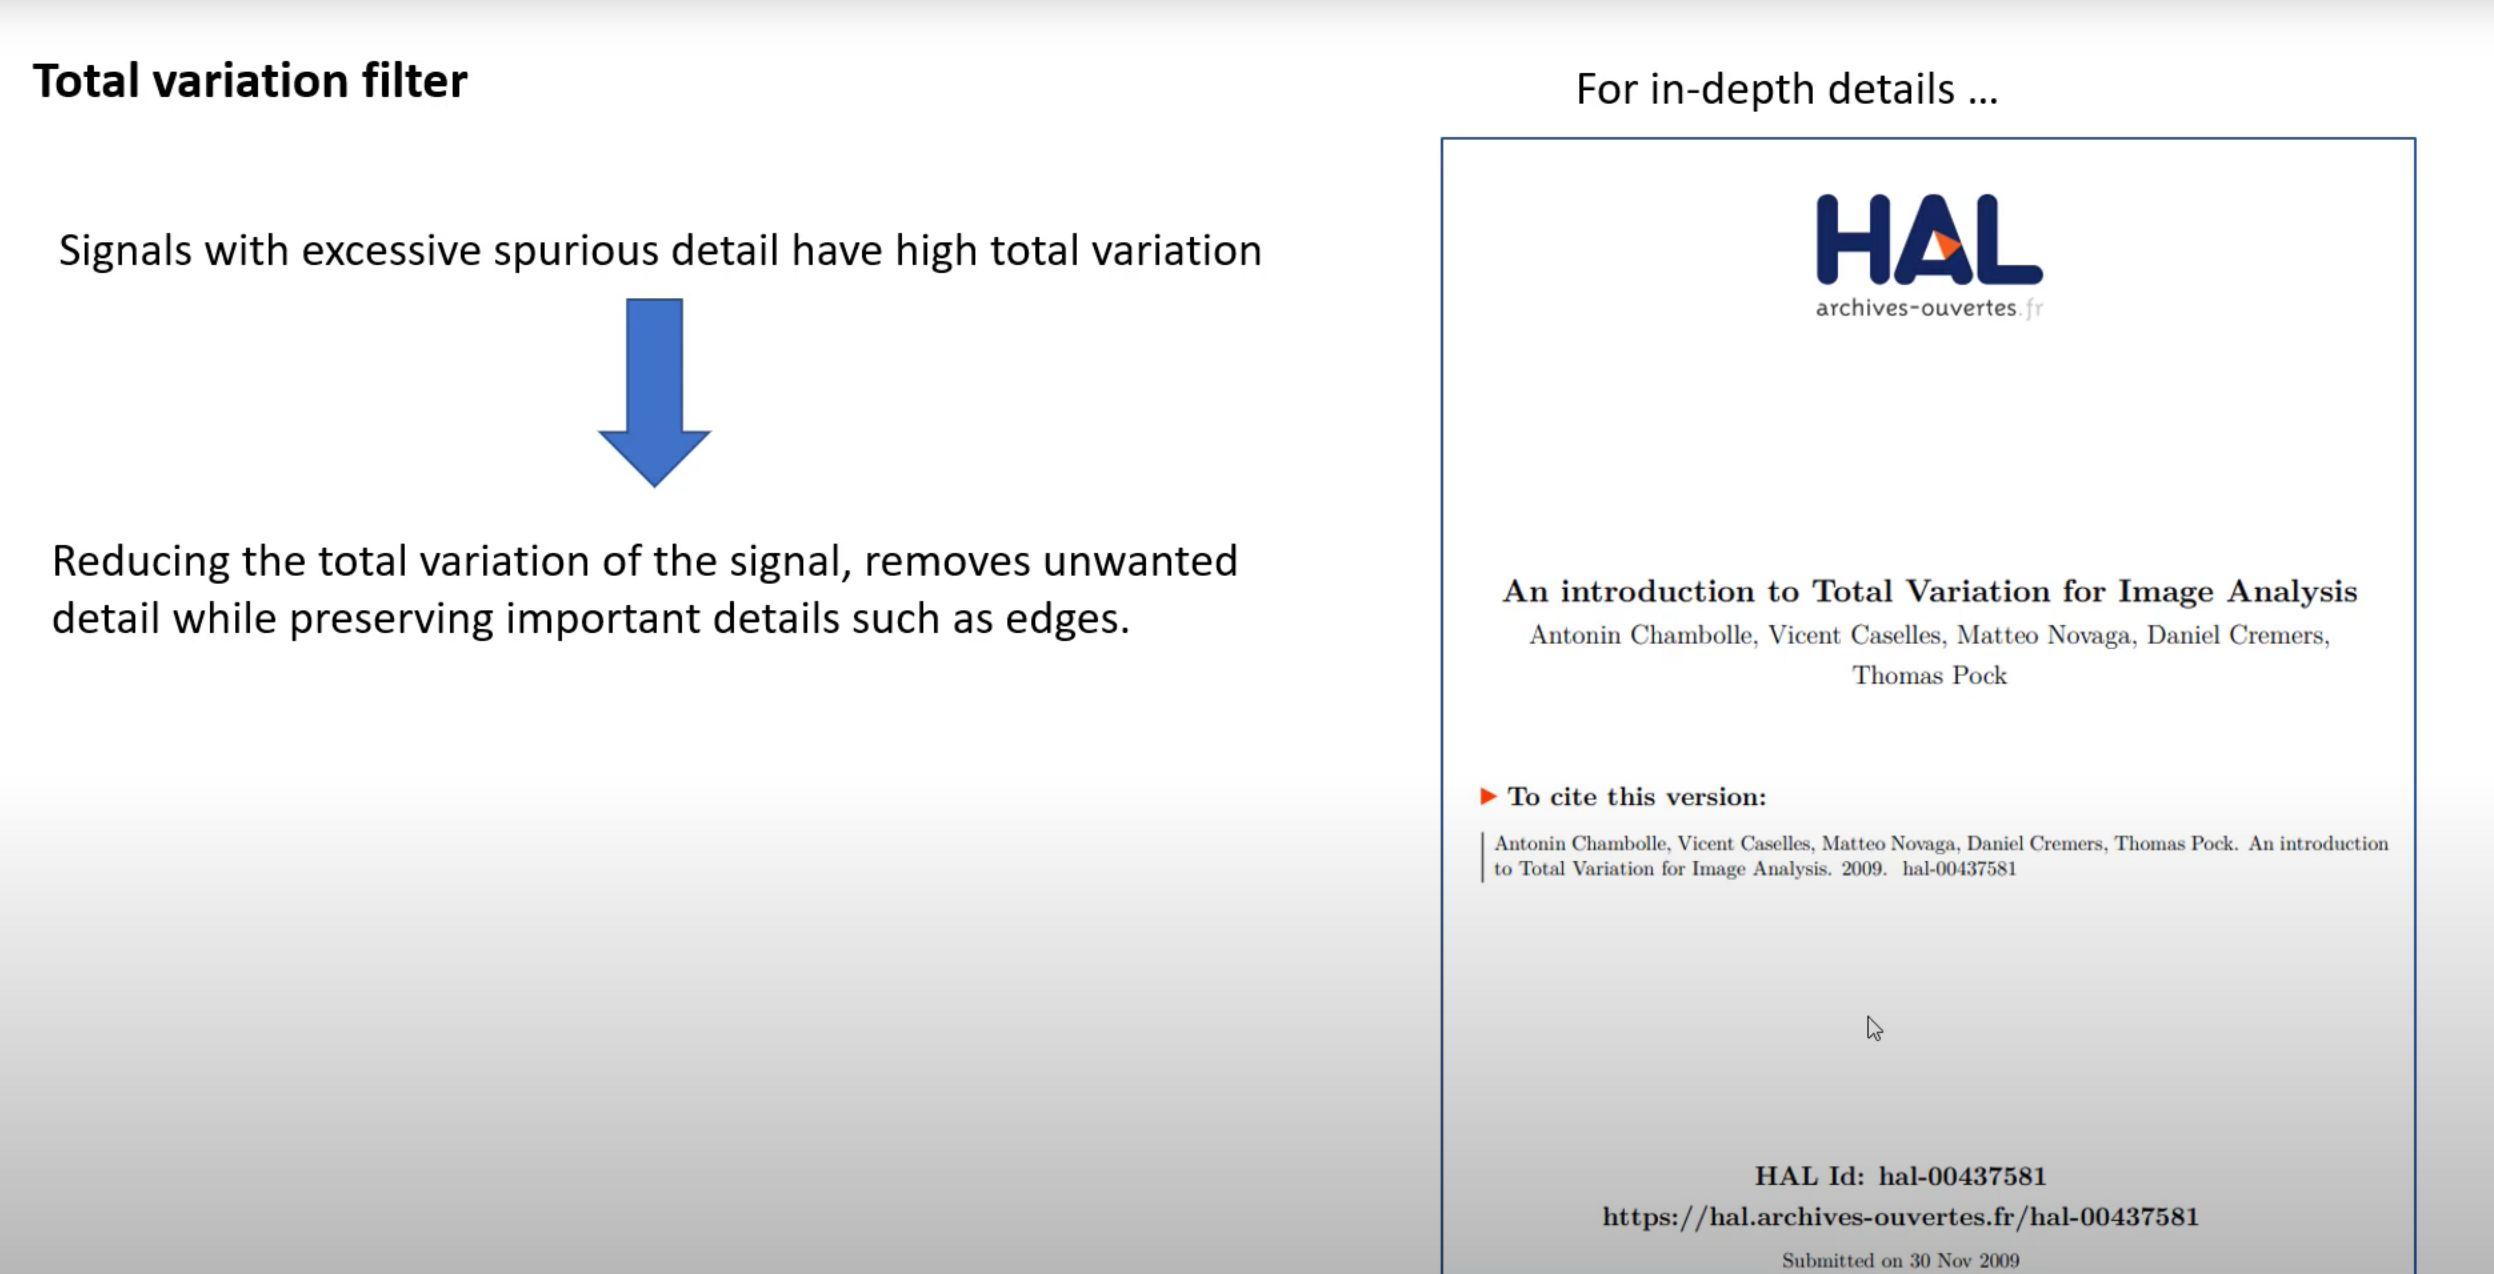

In [ ]:
from skimage.restoration import denoise_tv_chambolle
from matplotlib import pyplot as plt

img = img_as_float(io.imread ('images/denoising/noise.jpg', as_gray=True))

denoise_img = denoise_tv_chambolle(img, weight=0.1, esp=0.0002, max_num_iter=200, channel_axis=0)

cv2.imshow('Original image', img)
cv2.imshow("Denoised", denoise_img)

cv2.waitKey(0)
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
cv2.destroyAllWindows()

# Block Matching 3D Filter (BM3D)

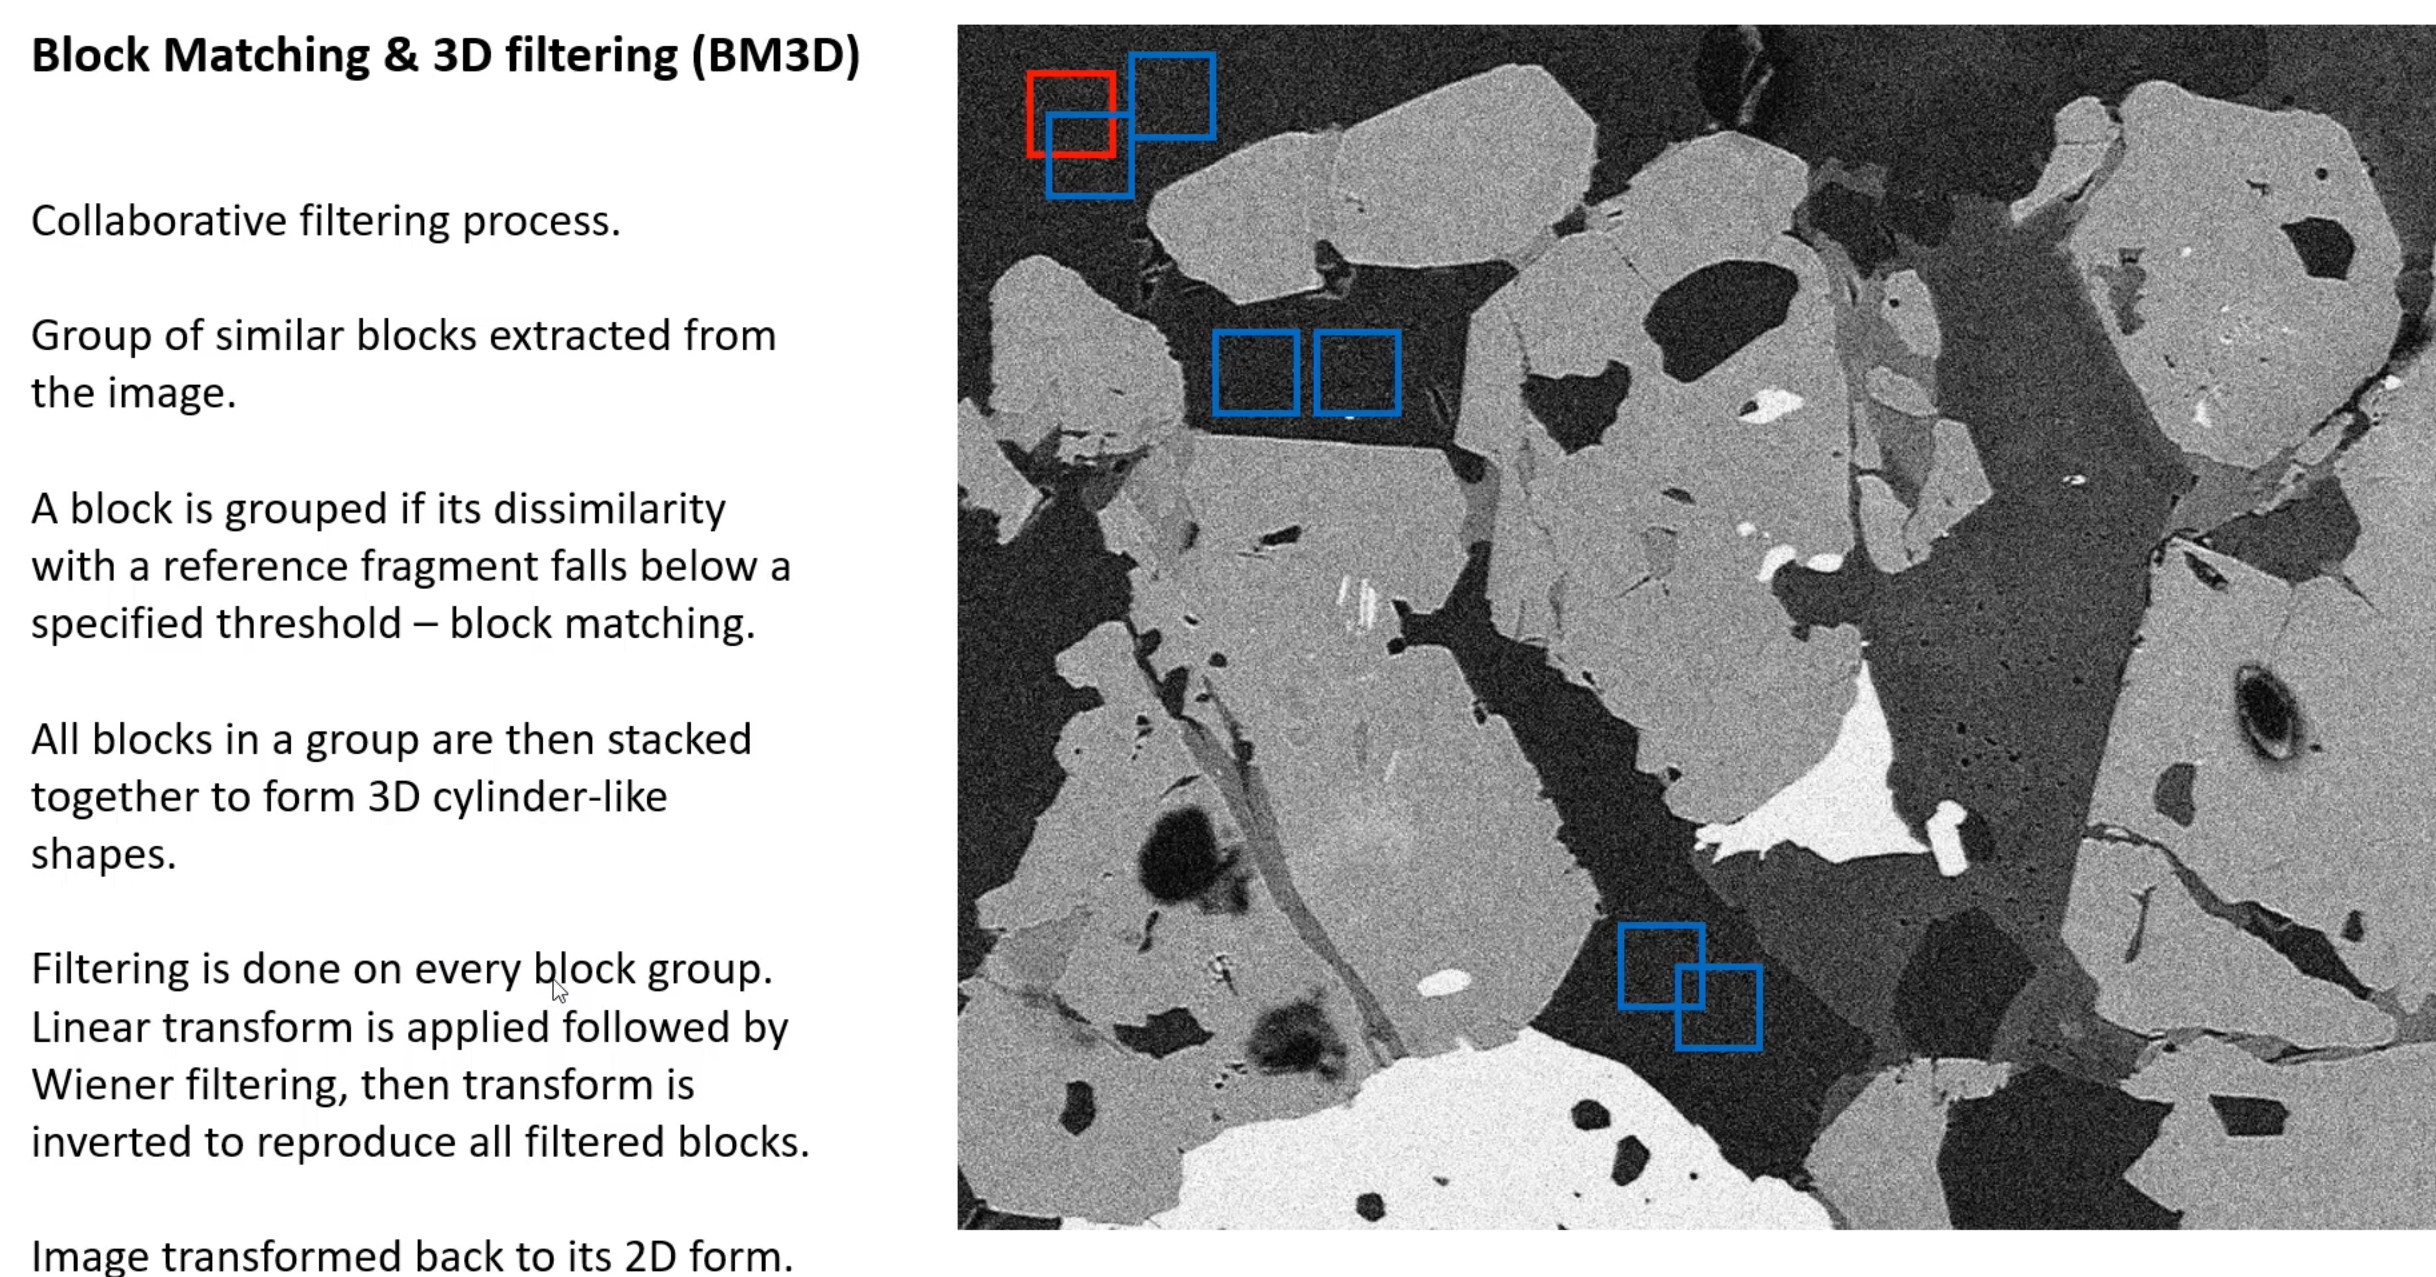

In [ ]:
from skimage import io, img_as_float
import bm3d
import cv2

noisy_img = img_as_float(io.imread ('images/denoising/noise.jpg', as_gray=True))
BM3D_denoised = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.ALL_STAGES)

cv2. imshow("original", noisy_img)
cv2. imshow("Denoised", BM3D_denoised)

cv2.waitKey(0)
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
cv2.destroyAllWindows()

# Unsharp Mask

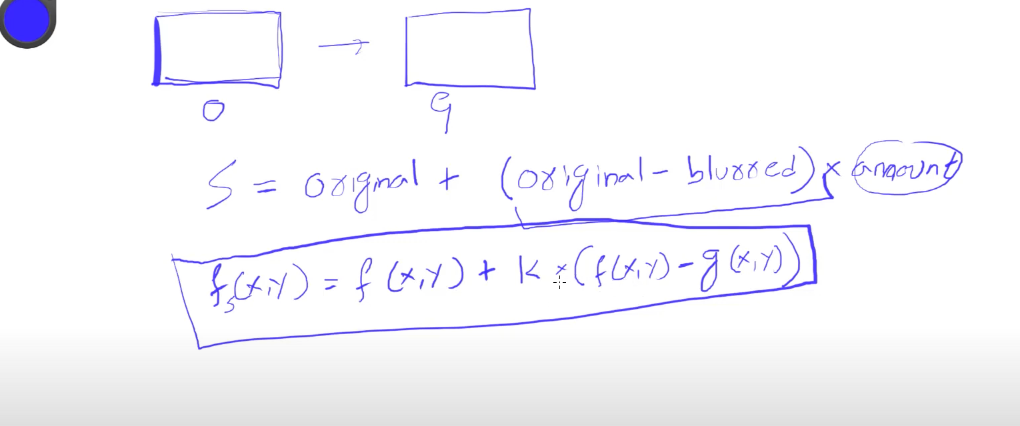

In [ ]:
# Unsharp mask is basically sharpening the image -> just opposite of it's name

# Frist we will sharpen the image by creating our own function -> using gaussian filter
from skimage.filters import gaussian

img = img_as_float(io.imread ('images/denoising/noise.jpg', as_gray=True))

gaussian_img = gaussian(img, sigma=1, mode='constant', cval=0.0)

amount = 1.0
img2 = (img - gaussian_img)*amount

img3 = img + img2

plt.imshow(img3, cmap='gray')

In [ ]:
# using the function in skimage library
from skimage. filters import unsharp_mask

img =io.imread ('images/denoising/noise.jpg')

unsharped_img = unsharp_mask(img, radius=3, amount=1.0)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot (2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text ('Input Image')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(unsharped_img, cmap='gray')
ax2.title.set_text('Unsharped Image')

plt.show()